<a href="https://colab.research.google.com/github/anastasiaperry/B-field/blob/main/Electric_Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

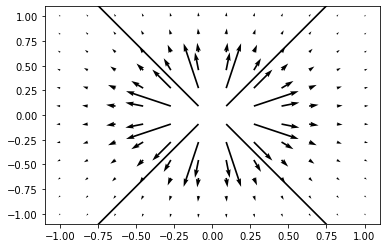

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

charge1_pos = [0,0]
q = 3e-6 #C
k = 9e9 #Nm^2 / C^2

# We create two linear arrays with 64 points in the range −2,2

nx = 12
ny = 12
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)

# And then we use meshgrid that creates an array of coordinates for X and Y

X, Y = np.meshgrid(x,y)

# Initialize our field components to be zero

u = np.zeros(X.shape)
v = np.zeros(X.shape)

def EFieldSingleCharge(rx, ry):
    x = charge1_pos[0]-rx
    y = charge1_pos[1]-ry
    rmag = np.hypot(x,y)

    if rmag <= 0:
        return (0,0)

    else:
        Emag = k*q / rmag**2
        u = Emag* (rx / rmag)
        v = Emag* (ry / rmag)
        return (u,v)

test = np.vectorize(EFieldSingleCharge)
u,v = test(X,Y)


plt.quiver(X,Y,u,v)

plt.show()

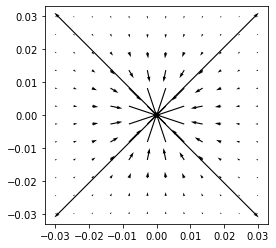

In [ ]:
#single charge
import numpy as np

xlist = np.linspace(-0.03,0.03,12)
ylist = np.linspace(-0.03,0.03,12)

X,Y = np.meshgrid(xlist,ylist)

# Set the electric constant k = 9 * 10^9 N m^2 / C^2.
# The actual value won't matter, since our field diagram
# will automatically scale to fit.
k = 9e9
charge_pos = [0,0]
charge = -2e-6 #C

# Calculate the components of an electric field.
def PointEField(q,ThisCharge,xField,yField):
    # The field is created by a charged particle called ThisCharge.
    # ThisCharge should be a dictionary created by the charge() function.
    # The field is measured at (xField,yField).

    # Calculate the distance between the charge and the field point.
    rx = xField - ThisCharge[0]
    ry = yField - ThisCharge[1]
    rmag = np.hypot(rx,ry)

    if rmag<=0:
        return (0,0)
    else:
        # Calculate the electric field's magnitude.
        Emag = k*q/rmag**2

        # Calculate the x- and y-components of the field.
        Ex = Emag * (rx / rmag)
        Ey = Emag * (ry / rmag)

        # Return the two components as the function's outputs.
        return Ex,Ey

import matplotlib.pyplot as plt



for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Ex[i,j],Ey[i,j] = PointEField(charge,charge_pos, X[i,j],Y[i,j])



plt.figure(figsize=(4,4))
plt.quiver(X,Y,Ex,Ey)
#plt.plot(.02*np.cos(np.linspace(0,np.pi*2,361)),0.02*np.sin(np.linspace(0,np.pi*2,361)))
plt.show()

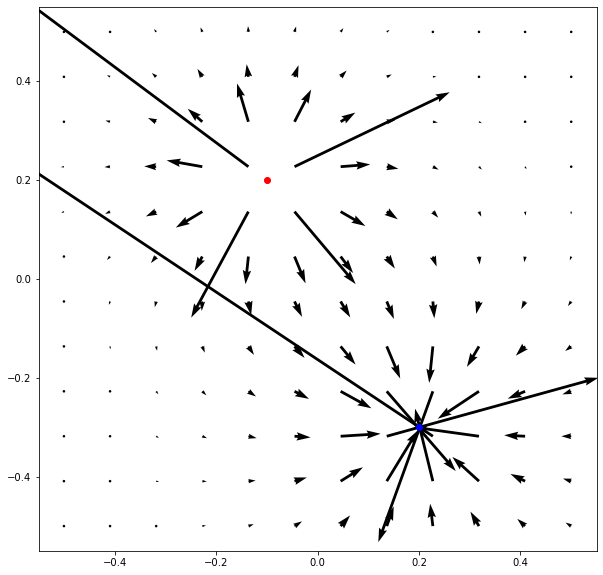

In [ ]:
# multiple charges
import numpy as np

xlist = np.linspace(-0.5,0.5,12)
ylist = np.linspace(-0.5,0.5,12)

X,Y = np.meshgrid(xlist,ylist)

# Set the electric constant k = 9 * 10^9 N m^2 / C^2.
# The actual value won't matter, since our field diagram
# will automatically scale to fit.
k = 9e9
charge1_pos = [-.1,0.2] #m
charge1 = 50e-6 #C
charge2_pos = [0.2,-0.3] #m
charge2 = -75e-6 #C

# Calculate the components of an electric field.
def PointEField(q,ThisCharge,xField,yField):
    # The field is created by a charged particle called ThisCharge.
    # The field is measured at (xField,yField).

    # Calculate the distance between the charge and the field point.
    rx = xField - ThisCharge[0]
    ry = yField - ThisCharge[1]
    rmag = np.hypot(rx,ry)

    if rmag<=0:
        return (0,0)
    else:
        # Calculate the electric field's magnitude.
        Emag = k*q/rmag**2

        # Calculate the x- and y-components of the field.
        Ex = Emag * (rx / rmag)
        Ey = Emag * (ry / rmag)

        # Return the two components as the function's outputs.
        return Ex,Ey

import matplotlib.pyplot as plt

Ex1 = np.zeros(X.shape)
Ey1 = np.zeros(X.shape)
Ex2 = np.zeros(X.shape)
Ey2 = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Ex1[i,j],Ey1[i,j] = PointEField(charge1,charge1_pos, X[i,j],Y[i,j])
        Ex2[i,j],Ey2[i,j] = PointEField(charge2,charge2_pos, X[i,j],Y[i,j])

u = Ex1 + Ex2
v = Ey1 + Ey2


plt.figure(figsize=(10,10))
plt.quiver(X,Y,u,v)
plt.plot(charge1_pos[0],charge1_pos[1],'ro')
plt.plot(charge2_pos[0],charge2_pos[1],'bo')
plt.show()